# Softmax Regression
- This notebook contains the code to implement the Softmax Regression algorithm from scratch using `Gradient Descent`
- `Softmax Regression` is an extension of Logistic Regression which can be used to solve multi-class classification problems directly

## Importing Libraries

In [ ]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# timing
from timeit import default_timer as timer

## Custom Class

In [ ]:
class StandardScaler:

  def __init__(self):
    pass


  def fit(self, X, y=None):
    self.means_ = np.mean(X, axis=0)
    self.std_ = np.std(X, axis=0)
    return self


  def transform(self, X):
    return (X - self.means_) / self.std_


  def inverse_transform(self, X):
    return (X * self.std_) + self.means_

In [ ]:
class SoftmaxRegression:

  def __init__(self,
               eta=1.0,
               eta_d=10,
               tol=1e-3,
               epsilon=1e-5,
               n_epochs=100,
               random_state=None):
    """
    Parameters:
    -----------

    eta: float
         Used in the learning rate for gradient descent

    eta_d: int
           Used in learning schedule for updating the learning rate for gradient descent

    tol: float
         For checking convergence of gradient descent

    epsilon: float
             Added to the arguments in log function to avoid errors

    n_epochs: int
              The no. of times to iterate over the entire dataset for gradient descent

    random_state: int
                  For controlling the randomness and reproducibility of results across multiple runs
    """
    self.eta = eta
    self.eta_d = eta_d
    self.tol = tol
    self.epsilon = epsilon
    self.n_epochs = n_epochs
    self.random_state = random_state


  def _get_one_hot(self, a):
    return np.diag(np.ones(self.n_classes_))[a]


  def _get_scores(self, A):
    return (A @ self.w_.T) + self.b_


  def _get_probabilities(self, A):
    exps = np.exp(A)
    exps_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exps_sums


  def _learning_schedule(self, i):
    return self.eta / (self.eta_d + i)


  def _display_training(self):
    # this function plots the result of gradient descent
    x_range = np.arange(1, len(self.costs_) + 1)
    plt.figure(figsize=(6, 4))
    plt.plot(x_range,
             self.costs_,
             linewidth=2)
    plt.xlabel("No. of Iterations")
    plt.ylabel("Cost")
    plt.title("Gradient Descent")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


  def fit(self, X, y):
    # this function will train a Softmax Regression model

    if self.random_state:
      np.random.seed(self.random_state)

    n = X.shape[0]
    self.n_features_in_ = X.shape[1]
    self.n_classes_ = len(np.unique(y))
    self.b_ = np.random.rand(self.n_classes_)
    self.w_ = np.random.rand(self.n_classes_, self.n_features_in_)
    self.costs_ = []

    Y = self._get_one_hot(y)

    prev_J = np.inf
    for i in range(self.n_epochs):
      scores = self._get_scores(X)
      P = self._get_probabilities(scores)
      errors = Y - P

      # computing the cost
      J = -((Y * np.log(P + self.epsilon)).sum(axis=1)).mean()
      if np.abs(prev_J - J) <= self.tol:
        print(f"> Gradient Descent converged in {i + 1} iterations")
        break
      prev_J = J
      self.costs_.append(J)

      # computing the gradients
      dJ_dw = (-1 / n) * (errors.T @ X)
      dJ_db = -errors.mean(axis=0)

      # updating the weights
      alpha = self._learning_schedule(i + 1)
      self.w_ -= (alpha * dJ_dw)
      self.b_ -= (alpha * dJ_db)
    if i == self.n_epochs - 1:
      print(f"> Gradient Descent ran all {self.n_epochs} iterations")

    print("> Successfully Trained the Softmax Regression model!\n")
    return self


  def predict_proba(self, X):
    # this function will return predicted probabilities
    scores = self._get_scores(X)
    return self._get_probabilities(scores)


  def predict(self, X):
    # this function will return predicted labels
    return np.argmax(self.predict_proba(X), axis=1)


  def score(self, X, y):
    # this function will return the accuracy of the model
    y_pred = self.predict(X)
    return (y == y_pred).mean()

## Getting the Data

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
np.unique(y)

array([0, 1, 2])

In [ ]:
np.bincount(y)

array([50, 50, 50])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=7)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


## Scaling the Data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the Model

In [ ]:
softmax = SoftmaxRegression(eta=10,
                            eta_d=5,
                            tol=1e-5,
                            n_epochs=200,
                            random_state=7)
softmax.fit(X_train_scaled, y_train)

> Gradient Descent ran all 200 iterations
> Successfully Trained the Softmax Regression model!



In [ ]:
# Coefficients
softmax.w_

array([[-0.45483835,  1.56927961, -0.9852042 , -0.92253027],
       [ 0.96637451, -0.11027722,  0.46178059,  0.02475735],
       [ 1.08771919,  0.16836724,  1.62773833,  2.36626898]])

In [ ]:
# Bias Terms
softmax.b_

array([-0.04542536,  1.6278294 , -0.28776773])

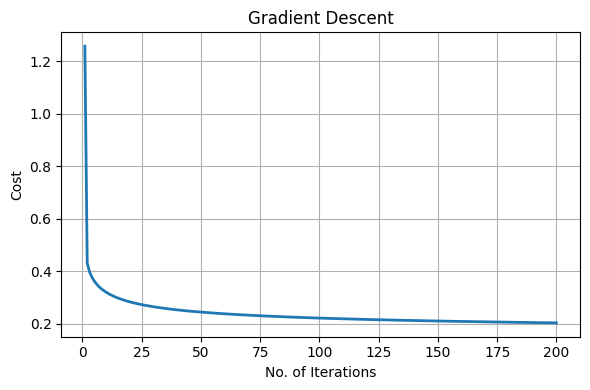

In [ ]:
softmax._display_training()

## Evaluating the Model

In [ ]:
softmax.score(X_train_scaled, y_train)

0.9416666666666667

In [ ]:
np.round(softmax.predict_proba(X_test_scaled)[:5], 3)

array([[0.003, 0.39 , 0.606],
       [0.982, 0.018, 0.   ],
       [0.993, 0.006, 0.   ],
       [0.019, 0.641, 0.34 ],
       [0.001, 0.26 , 0.738]])

In [ ]:
softmax.predict(X_test_scaled)

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 0, 2])

In [ ]:
softmax.score(X_test_scaled, y_test)

1.0

## Final Remarks:
- The Softmax Regression algorithm was successfully implemented from scratch using Python
- The model performs very well on the `Iris flowers` dataset
- Results may vary by using different values for class parameters like `eta`, `random_state` and `tol`